# Evaluation of the full GCM-driven run

In [1]:
import valenspy as vp
from valenspy._utilities import load_yml
from valenspy.processing.select import select_point
from valenspy.diagnostic.functions import mean_bias, mean_absolute_error, root_mean_square_error, spearman_correlation, perkins_skill_score, time_series_spatial_mean
from valenspy.diagnostic.visualizations import plot_time_series, plot_map
from pathlib import Path

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

from eval_gcm_functions import *

# define machine name - used for paths of (observational) datasets
machine = 'hortense'

manager = vp.InputManager(machine=machine)

## 0. Settings

In [2]:
# Define datasets
gcm = 'EC-Earth'
domain = 'EUR11'
model = "CCLM"
experiment_type = "historical"
experiment = f"CB2_{model}_{domain}_{gcm}_{experiment_type}"

experiment_era5 = f"CB2_{model}_{domain}_ERA5_evaluation"

figdir = "../../output/figures_gcm_evaluation/"
figdir_exp = figdir + f"{experiment}/"
Path(figdir_exp).mkdir(parents=True, exist_ok=True)

## 1. EUR 11


### Temperature 2m

In [ ]:
variable = "tas"
ds = manager.load_data("CCLM", variable, freq="daily", path_identifiers=[experiment, daily_statistic])

File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_EC-Earth_historical/T_2M/daily/T_2M_daily_mean_1995.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_EC-Earth_historical/T_2M/daily/T_2M_daily_mean_2009.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_EC-Earth_historical/T_2M/daily/T_2M_daily_mean_1992.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_EC-Earth_historical/T_2M/daily/T_2M_daily_mean_2007.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_EC-Earth_historical/T_2M/daily/T_2M_daily_mean_1998.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_EC-Earth_historical/T_2M/daily/T_2M_daily_mean_1997.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_E

<xarray.Dataset> Size: 6GB
Dimensions:       (time: 8390, bnds: 2, rlat: 434, rlon: 446)
Coordinates:
  * time          (time) datetime64[ns] 67kB 1992-01-01T11:30:00 ... 2014-12-...
    lon           (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
    lat           (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
  * rlon          (rlon) float32 2kB -29.58 -29.48 -29.36 ... 19.15 19.25 19.36
  * rlat          (rlat) float32 2kB -24.58 -24.48 -24.36 ... 22.83 22.93 23.05
    height_2m     float32 4B 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 134kB dask.array<chunksize=(366, 2), meta=np.ndarray>
    rotated_pole  (time) |S1 8kB b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    tas           (time, rlat, rlon) float32 6GB dask.array<chunksize=(285, 338, 347), meta=np.ndarray>
Attributes: (12/18)
    CDI:               Climate Data Interface version 2.3.0 (https://mpimet.m...
    Conventions:       CF-1.4
    source:            cosmo6.00_clm2, int2lm3.0_clm1
    institution:       KU Leuven, Leuven, BELGIUM
    title:             EUR11_NU_TT_EC
    project_id:        CORDEXbe2
    ...                ...
    history:           Tue Jan 14 17:28:04 2025: cdo daymean daily/temp/T_2M_...
    frequency:         day
    CDO:               Climate Data Operators version 2.3.0 (https://mpimet.m...
    freq:              daily
    path_identifiers:  ['CB2_CCLM_EUR11_EC-Earth_historical', 'mean']
    dataset:           CCLM

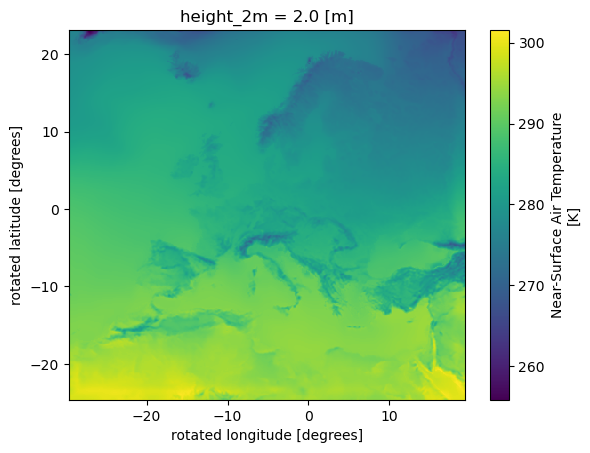

In [11]:
da_ec_earth = ds[variable].mean('time')
da_ec_earth.plot()

In [10]:
variable = "tas"
ds_era5 = manager.load_data("CCLM", variable, freq="daily", path_identifiers=[experiment_era5, daily_statistic])

File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_2000.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_2019.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1979.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_2012.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_2023.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_2017.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation/T_2M/dail

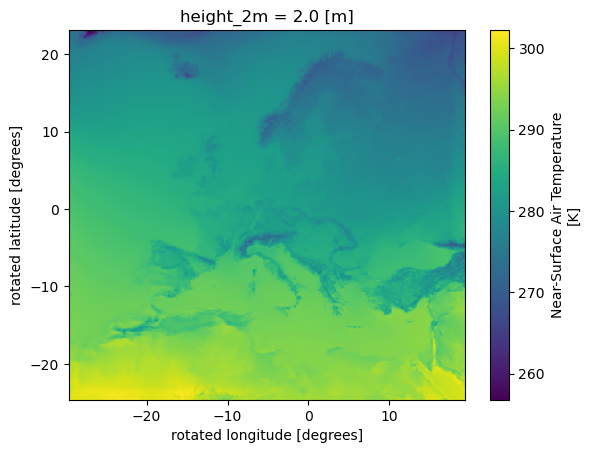

In [12]:
da_era5 = ds_era5[variable].mean('time')
da_era5.plot()

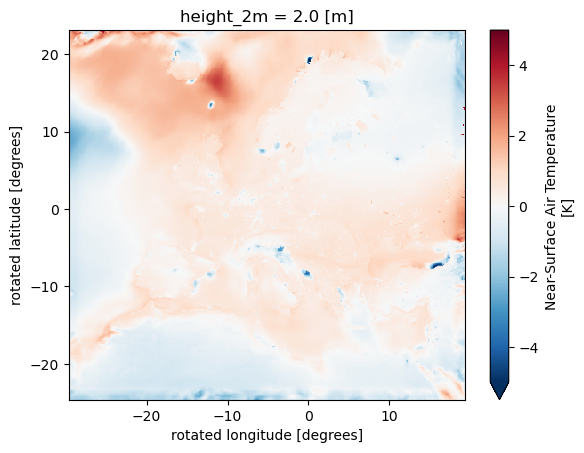

In [20]:
(da_ec_earth-da_era5).plot(vmin=-3,vmax=3,cmap='RdBu_r')

## ERA5 first year

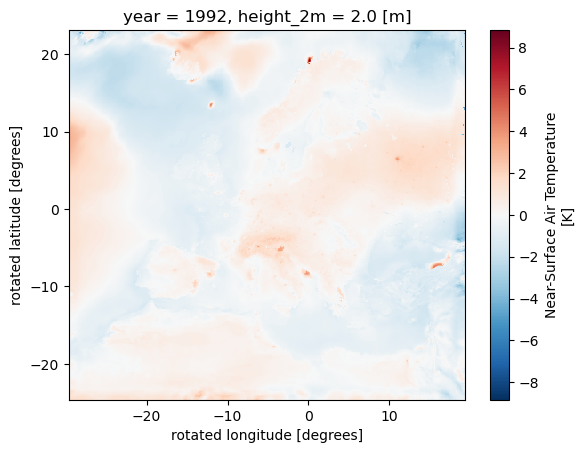

In [21]:
da_firstyear = ds[variable].groupby('time.year').mean('time')

da_firstyear_era5 = ds_era5[variable].groupby('time.year').mean('time')
(da_firstyear_era5 - da_firstyear)[0,:,:].plot()